# 과제

## Titanic 데이터를 가지고 5 개의 FE 방법들 직접 사용해보기 (오늘 피피티에 소개되지 않은 FE 방법도 괜찮음)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Imputation

In [3]:
titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
# 제거
titanic_imp1 = titanic
print('결측치 제거 전 데이터 개수 :', len(titanic_imp1))
titanic_imp1 = titanic_imp1.dropna()
print('결측치 제거 후 데이터 개수 :', len(titanic_imp1))

결측치 제거 전 데이터 개수 : 418
결측치 제거 후 데이터 개수 : 87


In [5]:
titanic_imp1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
# 대체: 0
titanic_imp2 = titanic
print('대체 전 결측치 개수 :', titanic_imp2.isnull().sum().sum())
titanic_imp2 = titanic_imp2.fillna(0)
print('대체 후 결측치 개수 :', titanic_imp2.isnull().sum().sum())

대체 전 결측치 개수 : 414
대체 후 결측치 개수 : 0


In [7]:
# 대체: mean
titanic_imp3 = titanic
print('mean 대체 전 결측치 개수 :', titanic_imp3.isnull().sum().sum())
titanic_imp3 = titanic_imp3.fillna(titanic.mean)
print('mean 대체 후 결측치 개수 :', titanic_imp3.isnull().sum().sum())
print('----------------------------------------')

# 대체: median
titanic_imp4 = titanic
print('median 대체 전 결측치 개수 :', titanic_imp4.isnull().sum().sum())
titanic_imp4 = titanic_imp4.fillna(titanic.median)
print('median 대체 후 결측치 개수 :', titanic_imp4.isnull().sum().sum())

mean 대체 전 결측치 개수 : 414
mean 대체 후 결측치 개수 : 0
----------------------------------------
median 대체 전 결측치 개수 : 414
median 대체 후 결측치 개수 : 0


In [8]:
# 대체: 최대빈도수
age_most_freq = titanic['Age'].value_counts().index[0]
print('Age열 최대빈도수', age_most_freq)
fare_most_freq = titanic['Fare'].value_counts().index[0]
print('Fare열 최대빈도수', fare_most_freq)
cabin_most_freq = titanic['Cabin'].value_counts().index[0]
print('Cabin열 최대빈도수', cabin_most_freq)
print('----------------------------------------')

titanic_imp5 = titanic.copy()
print('최대빈도수 대체 전 결측치 개수 :', titanic_imp5.isnull().sum().sum())
print('Age 열의 최대빈도수 개수 :', titanic_imp5.Age.value_counts().iloc[0])
print('Fare 열의 최대빈도수 개수 :', titanic_imp5.Fare.value_counts().iloc[0])
print('Cabin 열의 최대빈도수 개수 :', titanic_imp5.Cabin.value_counts().iloc[0])
print('----------------------------------------')

titanic_imp5['Age'] = titanic_imp5['Age'].fillna(age_most_freq)
titanic_imp5['Fare'] = titanic_imp5['Fare'].fillna(fare_most_freq)
titanic_imp5['Cabin'] = titanic_imp5['Cabin'].fillna(cabin_most_freq)
print('최대빈도수 대체 후 결측치 개수 :', titanic_imp5.isnull().sum().sum())
print('Age 열의 최대빈도수 개수 :', titanic_imp5.Age.value_counts().iloc[0])
print('Fare 열의 최대빈도수 개수 :', titanic_imp5.Fare.value_counts().iloc[0])
print('Cabin 열의 최대빈도수 개수 :', titanic_imp5.Cabin.value_counts().iloc[0])

Age열 최대빈도수 21.0
Fare열 최대빈도수 7.75
Cabin열 최대빈도수 B57 B59 B63 B66
----------------------------------------
최대빈도수 대체 전 결측치 개수 : 414
Age 열의 최대빈도수 개수 : 17
Fare 열의 최대빈도수 개수 : 21
Cabin 열의 최대빈도수 개수 : 3
----------------------------------------
최대빈도수 대체 후 결측치 개수 : 0
Age 열의 최대빈도수 개수 : 103
Fare 열의 최대빈도수 개수 : 22
Cabin 열의 최대빈도수 개수 : 330


In [9]:
# 임의의 값 대체
titanic_imp6 = titanic
print('pad 대체 전 결측치 개수 :', titanic_imp6.isnull().sum().sum())
titanic_imp6 = titanic_imp6.fillna(method='pad')
print('pad 대체 후 결측치 개수 :', titanic_imp6.isnull().sum().sum())
print('----------------------------------------')

titanic_imp7 = titanic
print('bfill 대체 전 결측치 개수 :', titanic_imp7.isnull().sum().sum())
titanic_imp7 = titanic_imp7.fillna(method='bfill')
print('bfill 대체 후 결측치 개수 :', titanic_imp7.isnull().sum().sum())

pad 대체 전 결측치 개수 : 414
pad 대체 후 결측치 개수 : 12
----------------------------------------
bfill 대체 전 결측치 개수 : 414
bfill 대체 후 결측치 개수 : 5


## Indicator Variables

<AxesSubplot:>

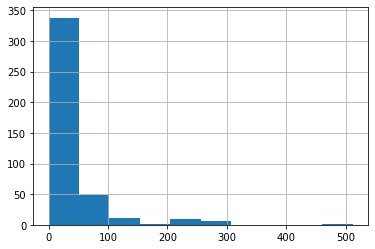

In [10]:
titanic['Fare'].hist()

In [11]:
titanic_ind = titanic.copy()

def Fare_price(fare):
    if fare <= 100:
        return 'low'
    elif fare <= 300:
        return 'middle'
    else:
        return 'high'

titanic_ind['Fare_price'] = titanic_ind['Fare'].apply(Fare_price)
titanic_ind.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_price
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,low
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,low
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,low
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,low
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,low


## Feature split

In [12]:
titanic_fsplit = titanic.copy()

titanic_fsplit['First_Name'] = titanic['Name'].apply(lambda x: x.split(',')[0])
titanic_fsplit['Family_Name'] = titanic['Name'].apply(lambda x: x.split(' ')[2])

titanic_fsplit.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_Name,Family_Name
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,James
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,James
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Thomas
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Albert
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Alexander


## Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
mm_scaler = MinMaxScaler()
sd_scaler = StandardScaler()

# MinMax Scaling
titanic_sc = titanic.copy()
mm_scaler = mm_scaler.fit_transform(titanic_sc['Fare'].values.reshape(-1,1))
titanic_sc['mm_scaled_age'] = mm_scaler

# Standard Scaling
sd_scaler = sd_scaler.fit_transform(titanic_sc['Fare'].values.reshape(-1,1))
titanic_sc['sd_scaled_age'] = sd_scaler

titanic_sc.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,mm_scaled_age,sd_scaled_age
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,417.000000,4.170000e+02
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.069540,-5.258251e-17
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.109124,1.001201e+00
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,-6.380170e-01
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.015412,-4.966178e-01
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.028213,-3.791690e-01
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,0.061484,-7.391031e-02
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,8.536851e+00


## One-hot encoding, Label encoding

In [14]:
# One-hot encoding
titanic_onehot = titanic.copy()
pd.get_dummies(titanic_onehot['Sex'])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [15]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

titanic_label = titanic.copy()

encoder = LabelEncoder()
encoded = encoder.fit_transform(titanic_label['Sex'])
titanic_label['Sex_encoded'] = encoded

titanic_label.Sex_encoded.value_counts()

1    266
0    152
Name: Sex_encoded, dtype: int64